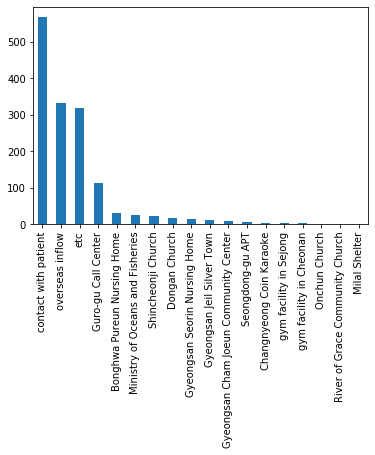

In [216]:
import pandas as pd
import numpy as np

# 정책의 시행 개수와 코로나 확진자 수의 관계

co_data = pd.read_csv('patientinfo.csv')

co_data.head()


# co_data.info()


# patient_id ,country, city, infected_by, contact_number, symptom_onset_date, released_date, deceased_date, state 는 
# 분석에 도움이 안되므로 삭제.

co_data.drop(['patient_id','country', 'city', 'infected_by', 'contact_number', 'symptom_onset_date', 'released_date', 'deceased_date', 'state'], axis=1, inplace=True)

co_data.head()

# # 날짜를 월까지만 표기하도록 하고 각 월별 확진자 수를 새로운 열로 추가.

co_data['new_date'] = pd.to_datetime(co_data['confirmed_date'])
co_data['month'] = co_data['new_date'].dt.month

co_data.set_index('month')


co_data.drop(['confirmed_date', 'new_date'], axis=1, inplace= True)
print(co_data['month'].value_counts().sort_index())
co_data['month'].value_counts().sort_index().plot.bar()


Special Immigration Procedure                    10
School Opening Delay                              4
Drive-Through Screening Center                    1
Emergency Use Authorization of Diagnostic Kit     1
Social Distancing Campaign                        1
Self-Quarantine Safety Protection App             1
Open API                                          1
School Closure                                    1
Mask Distribution                                 1
Name: gov_policy, dtype: int64

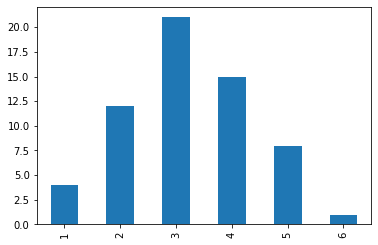

In [208]:
policy = pd.read_csv('policy.csv')

policy.head()
# policy_id,country, end_date 열을 삭제한다. 

policy.drop(['policy_id','country', 'end_date'], axis=1, inplace=True)

# start_date로 몇 월에 시행된 정책인지 묶는다.
policy['new_start'] = pd.to_datetime(policy['start_date'])
policy['month'] = policy['new_start'].dt.month

# 이제 start_date와 new_start열을 삭제한다.
policy.drop(['new_start','start_date'], axis=1 , inplace=True)


# 편의를 위해 month열을 맨 앞으로

policy.set_index('month').sort_values(by='month')
policy.head()


policy['month'].value_counts().sort_index().plot.bar()

# policy[policy['month']==3][['gov_policy','detail']]

policy[policy['month']==3]['gov_policy'].value_counts()

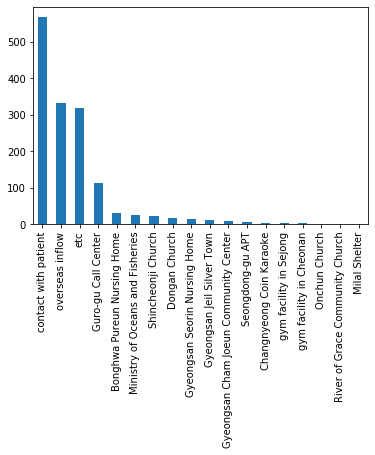

In [217]:
co_data = pd.read_csv('patientinfo.csv')
co_data['new_date'] = pd.to_datetime(co_data['confirmed_date'])
co_data['month'] = co_data['new_date'].dt.month

co_data.set_index('month')


co_data.drop(['confirmed_date', 'new_date'], axis=1, inplace= True)

co_data[co_data['month'] == 3.0]['infection_case'].value_counts().plot.bar()